In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# Dictionary to store image paths
image_paths = {
    "train_cataract": [],
    "train_normal": [],
    "test_cataract": [],
    "test_normal": []
}

# Walk through the directory
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train\\cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train\\normal" in path:
            image_paths["train_normal"].append(path)
        elif "test\\cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test\\normal" in path:
            image_paths["test_normal"].append(path)

In [3]:
len(image_paths["train_normal"])

250

In [4]:
from PIL import Image
from matplotlib import pyplot as plt

size of image : (512, 512, 3)


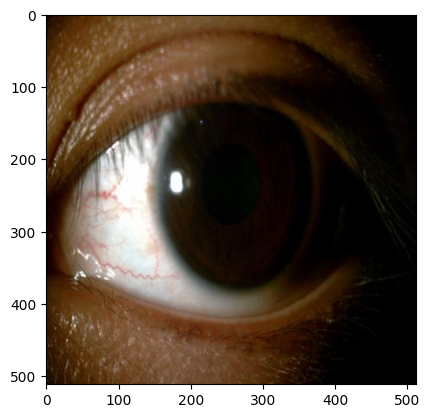

In [5]:
sample_img = np.array(Image.open(image_paths["test_normal"][1]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

size of image : (200, 200, 3)


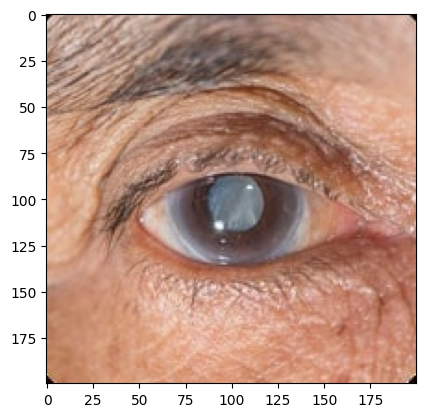

In [6]:
sample_img = np.array(Image.open(image_paths["test_cataract"][0]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

In [7]:
training_dir = "data\\train\\"
image_size = (55, 94, 3)
target_size = (55, 94)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.5 

)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = target_size,
    class_mode = 'binary'
)

Found 689 images belonging to 2 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers.experimental import RMSprop

In [11]:
model = Sequential([
    # Convolutional Neural Network (CNN) for feature extraction
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Dense Neural Network (DNN) for classification
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 53, 92, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 46, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 44, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 22, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 20, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 10, 128)        0

In [13]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [30]:
from keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='accuracy', patience=5)

history = model.fit(
    train_generator,
    epochs=30,
    callbacks=[early_stop]
)

Epoch 1/30
11/22 [==============>...............] - ETA: 1s - loss: 0.3192 - accuracy: 0.8754

c:\Users\L E N O V O\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/22 [==============================] - 4s 184ms/step - loss: 0.3216 - accuracy: 0.8636
Epoch 2/30
22/22 [==============================] - 4s 180ms/step - loss: 0.2841 - accuracy: 0.8897
Epoch 3/30
22/22 [==============================] - 3s 157ms/step - loss: 0.3006 - accuracy: 0.8781
Epoch 4/30
22/22 [==============================] - 3s 141ms/step - loss: 0.2951 - accuracy: 0.8839
Epoch 5/30
22/22 [==============================] - 4s 162ms/step - loss: 0.2557 - accuracy: 0.8940
Epoch 6/30
22/22 [==============================] - 3s 132ms/step - loss: 0.2587 - accuracy: 0.8940
Epoch 7/30
22/22 [==============================] - 3s 144ms/step - loss: 0.2664 - accuracy: 0.8824
Epoch 8/30
22/22 [==============================] - 3s 142ms/step - loss: 0.2199 - accuracy: 0.9057
Epoch 9/30
22/22 [==============================] - 4s 166ms/step - loss: 0.2412 - accuracy: 0.9013
Epoch 10/30
22/22 [==============================] - 4s 169ms/step - loss: 0.2288 - accuracy: 0.9115
Epoch 11/3

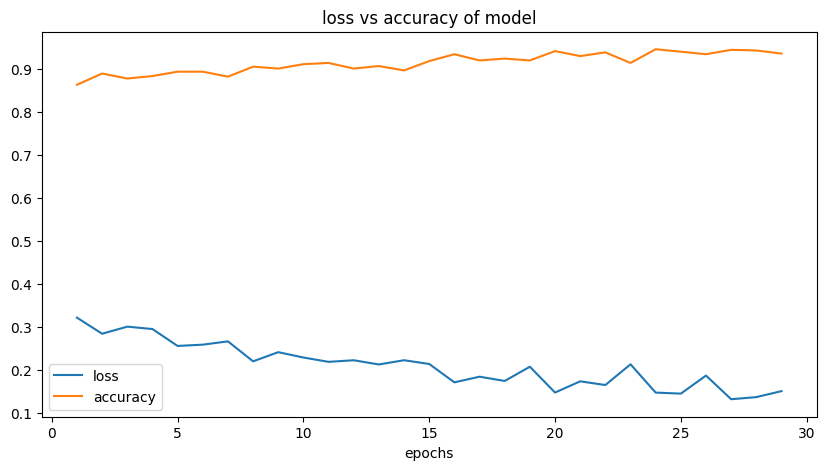

In [33]:
epochs = range(1, 30)
plt.figure(figsize=(10, 5))
plt.title("loss vs accuracy of model")
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.grid()
plt.xlabel("epochs")
plt.grid()
plt.legend()

In [34]:
from keras.preprocessing import image

In [35]:
label = train_generator.class_indices
print(label)

{'cataract': 0, 'normal': 1}


1/1 [==============================] - 0s 42ms/step
actual class : cataract
predicted class : cataract


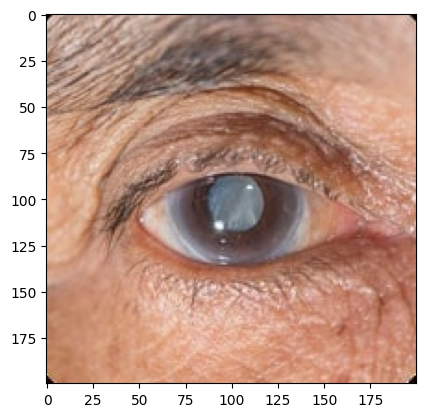

In [36]:
path = image_paths["test_cataract"][0]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("actual class : cataract")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

1/1 [==============================] - 0s 34ms/step
actual class : normal
predicted class : normal


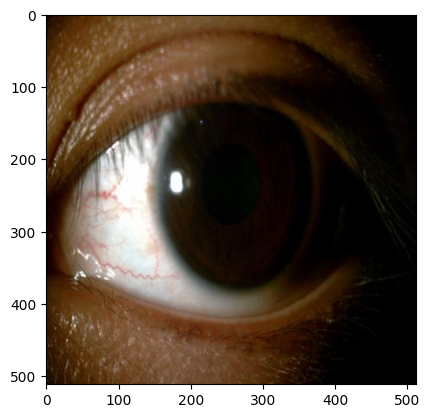

In [37]:
path = image_paths["test_normal"][1]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("actual class : normal")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

In [38]:
def _predict(model, path):
    img = np.array(Image.open(path).resize((94, 55)))
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    if pred[0] > 0.5:
        return 'normal'
    else:
        return 'cataract'

In [39]:
def evaluate(model, normal_path, cataract_path):
    normal_pred = []
    cataract_pred = []
    for normal, cataract in zip(normal_path, cataract_path):
        res_cataract = _predict(model, cataract)
        cataract_pred.append(res_cataract)
        
        res_normal = _predict(model, normal)
        normal_pred.append(res_normal)
    
    return normal_pred, cataract_pred

In [40]:
both_size = min(len(image_paths["test_normal"]), len(image_paths["test_cataract"]))
cataract_test_path = image_paths["test_cataract"][:both_size]
normal_test_path = image_paths["test_normal"][:both_size]
normal_pred, cataract_pred = evaluate(model, image_paths["test_normal"], image_paths["test_cataract"])

1/1 [==============================] - 0s 32ms/step


In [41]:
pred_df = pd.DataFrame()
pred_df["relative_path"] = normal_test_path + cataract_test_path
pred_df["actual_class"] = ["normal"]*len(normal_test_path) + ["cataract"]*len(cataract_test_path)
pred_df["predicted_class"] = normal_pred + cataract_pred

In [42]:
pred_df.tail(40)

,relative_path,actual_class,predicted_class
0,data\test\normal\normal (119).jpg,normal,cataract
1,data\test\normal\normal (120).jpg,normal,normal
2,data\test\normal\normal (175).jpg,normal,normal
3,data\test\normal\normal (176).jpg,normal,normal
4,data\test\normal\normal (204).jpg,normal,normal
5,data\test\normal\normal (23).jpeg,normal,normal
6,data\test\normal\normal (236).jpg,normal,normal
7,data\test\normal\normal (24).jpeg,normal,normal
8,data\test\normal\normal (247).jpg,normal,cataract
9,data\test\normal\normal (25).jpeg,normal,normal


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
y_true = pred_df['actual_class']
y_pred = pred_df['predicted_class']
conf_matrix = confusion_matrix(y_true, y_pred, labels=['normal', 'cataract'])
tn, fp, fn, tp = conf_matrix.ravel()

In [44]:
# Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label='normal')
recall = recall_score(y_true, y_pred, pos_label='normal')
f1 = f1_score(y_true, y_pred, pos_label='normal')

In [45]:
# Displaying the results
evaluation_summary = pd.DataFrame({
    "accuracy": [accuracy],
    "precision": [precision],
    "recall": [recall],
    "f1": [f1]
})

In [46]:
print(evaluation_summary)
print("Confusion Matrix:")
print('--------------------------------')
print(conf_matrix)

   accuracy  precision  recall        f1
0       0.9   0.944444    0.85  0.894737
Confusion Matrix:
--------------------------------
[[17  3]
 [ 1 19]]


In [29]:
#model.save('cataract_detection.h5')